In [1]:
import sympy
sympy.init_printing()

# Governing Equations

Conservation of mass

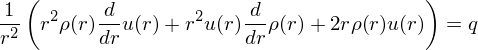

In [2]:
r = sympy.Symbol('r')
rho = sympy.Symbol('rho')
u = sympy.Symbol('u')
q = sympy.Symbol('q')
mass_conservation = sympy.Eq((1/r**2)*(r**2*rho(r)*u(r)).diff(r),q)
mass_conservation

Conservation of momentum

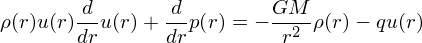

In [3]:
p = sympy.Symbol('p')
G = sympy.Symbol('G', positive=True)
M = sympy.Symbol('M', positive=True)
momentum_conservation = sympy.Eq(rho(r)*u(r)*u(r).diff(r) + p(r).diff(r),
                                 -rho(r)*G*M/r**2-q*u(r))
momentum_conservation

Energy conservation

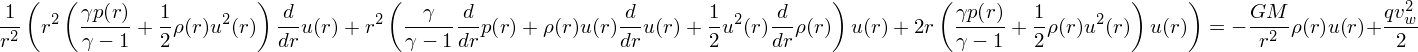

In [4]:
gamma = sympy.Symbol('gamma')
v_w = sympy.Symbol('v_w', positive=True)
energy_conservation = sympy.Eq((1/r**2)*(r**2*u(r)*(rho(r)*u(r)**2/2+gamma*p(r)/(gamma-1))).diff(r),
         -G*M*u(r)*rho(r)/r**2+v_w**2*q/2)
energy_conservation

Mass source term

In [5]:
D = sympy.Symbol('D')
eta = sympy.Symbol('eta')
mass_source = D*r**(-eta)
mass_source

# Reduction to dimensionless variables

Bondi radius

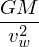

In [6]:
bondi_radius = G*M/v_w**2
bondi_radius

Bondi density

In [7]:
temp = D*bondi_radius**(-eta)*(bondi_radius/v_w)
temp = sympy.expand_power_base(temp,force=True)
temp = temp.simplify()
bondi_density = temp
bondi_density

Mass conservation

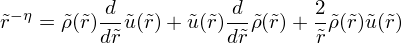

In [8]:
tilde_rho = sympy.Symbol(r'\tilde{\rho}')
tilde_r = sympy.Symbol(r'\tilde{r}')
tilde_u = sympy.Symbol(r'\tilde{u}')
temp = mass_conservation
temp = temp.subs(q, mass_source)
temp = temp.subs(rho(r).diff(r), bondi_density*tilde_rho(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(u(r).diff(r), v_w*tilde_u(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(rho(r), bondi_density*tilde_rho(tilde_r))
temp = temp.subs(u(r), v_w*tilde_u(tilde_r))
temp = sympy.Eq(temp.lhs*(G*M)**eta/D/(v_w**2)**eta, 
                temp.rhs*(G*M)**eta/D/(v_w**2)**eta)
temp = temp.subs(r, bondi_radius*tilde_r)
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
dimles_mass_conservation = temp
dimles_mass_conservation

Momentum conservation

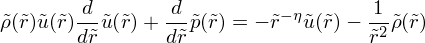

In [9]:
tilde_p = sympy.Symbol(r'\tilde{p}')
temp = momentum_conservation
temp = temp.subs(q, mass_source)
temp = temp.subs(rho(r).diff(r), bondi_density*tilde_rho(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(u(r).diff(r), v_w*tilde_u(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(p(r).diff(r), bondi_density*v_w**2*tilde_p(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(rho(r), bondi_density*tilde_rho(tilde_r))
temp = temp.subs(u(r), v_w*tilde_u(tilde_r))
temp = temp.subs(p(r), bondi_density*v_w**2*tilde_p(tilde_r))
temp = sympy.Eq(temp.lhs*(G*M)**eta/D/(v_w**2)**eta/v_w, 
                temp.rhs*(G*M)**eta/D/(v_w**2)**eta/v_w)
temp = temp.subs(r, bondi_radius*tilde_r)
temp = temp.simplify()
dimles_momentum_conservation = temp
dimles_momentum_conservation

Energy conservation

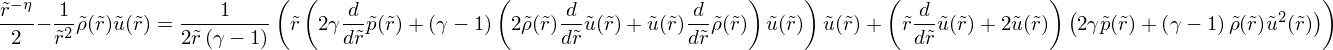

In [10]:
temp = energy_conservation
temp = temp.subs(q, mass_source)
temp = temp.subs(rho(r).diff(r), bondi_density*tilde_rho(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(u(r).diff(r), v_w*tilde_u(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(p(r).diff(r), bondi_density*v_w**2*tilde_p(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(rho(r), bondi_density*tilde_rho(tilde_r))
temp = temp.subs(u(r), v_w*tilde_u(tilde_r))
temp = temp.subs(p(r), bondi_density*v_w**2*tilde_p(tilde_r))
temp = sympy.Eq(temp.lhs*(G*M)**eta/D/(v_w**2)**eta/v_w**2, 
                temp.rhs*(G*M)**eta/D/(v_w**2)**eta/v_w**2)
temp = temp.subs(r, bondi_radius*tilde_r)
temp = temp.simplify()
dimles_energy_conservation = temp
dimles_energy_conservation

Integral expressions

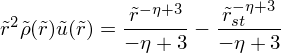

In [11]:
tilde_r_st = sympy.Symbol(r'\tilde{r}_{st}')
temp = tilde_r**(-eta)
temp *= tilde_r**2
temp = temp.simplify()
temp = temp.integrate(tilde_r,conds='none')
temp = temp - temp.subs(tilde_r, tilde_r_st)
temp = sympy.Eq(tilde_r**2*tilde_rho(tilde_r)*tilde_u(tilde_r), temp)
integral_mass_conservation = temp
integral_mass_conservation

Verification

In [12]:
temp = integral_mass_conservation
temp = temp.lhs - temp.rhs
temp = temp.diff(tilde_r)
temp = temp.subs(sympy.solve(dimles_mass_conservation,
                             tilde_rho(tilde_r).diff(tilde_r),dict=True)[0])
temp = temp.simplify()
temp

Energy conservation

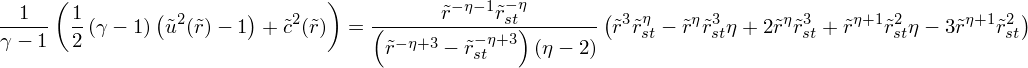

In [13]:
tilde_c = sympy.Symbol(r'\tilde{c}')
temp = -integral_mass_conservation.rhs
temp /= tilde_r**2
temp = temp.expand()
temp = temp.integrate(tilde_r,conds='none')
temp = temp - temp.subs(tilde_r, tilde_r_st)
temp = temp.simplify()
temp = temp.subs(eta**2-5*eta+6, (eta-2)*(eta-3))
temp = sympy.Eq(tilde_u(tilde_r)**2/2-sympy.Rational(1,2) + tilde_c(tilde_r)**2/(gamma-1),
               temp/integral_mass_conservation.rhs)
temp = temp.simplify()
integral_energy_conservation = temp
integral_energy_conservation

Verification

In [14]:
temp = integral_energy_conservation
temp = temp.subs(tilde_c(tilde_r), sympy.sqrt(gamma*tilde_p(tilde_r)/tilde_rho(tilde_r)))
temp = sympy.Eq(temp.lhs*integral_mass_conservation.lhs,
                temp.rhs*integral_mass_conservation.rhs)
temp = temp.lhs - temp.rhs
temp = temp.diff(tilde_r)
temp -= (dimles_energy_conservation.rhs-dimles_energy_conservation.lhs)*tilde_r**2
temp = temp.subs(sympy.solve(dimles_mass_conservation,tilde_rho(tilde_r).diff(tilde_r),dict=True)[0])
temp = temp.subs(sympy.solve(integral_mass_conservation,tilde_rho(tilde_r),dict=True)[0])
temp = temp.subs(sympy.solve([dimles_mass_conservation,
                              dimles_momentum_conservation,
                              dimles_energy_conservation],
                             [tilde_p(tilde_r).diff(tilde_r),
                             tilde_rho(tilde_r).diff(tilde_r),
                             tilde_u(tilde_r).diff(tilde_r)]))                           
temp = temp.simplify()
temp = temp.subs(sympy.solve(integral_mass_conservation,tilde_rho(tilde_r),dict=True)[0])
temp.simplify()

# Solutions without Gravity
In this case the fluid velocity and the speed of sound are constant. The density is a single power law

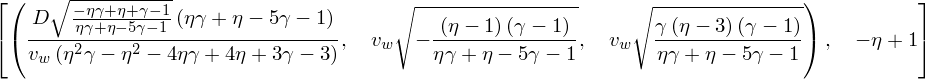

In [15]:
c = sympy.Symbol('c')
alpha = sympy.Symbol('alpha')
A = sympy.Symbol('A')
temp = [mass_conservation,momentum_conservation,energy_conservation]
temp = map(lambda eqn: eqn.subs(q,mass_source), temp)
temp = map(lambda eqn: eqn.subs(p(r),rho(r)*c(r)**2/gamma), temp)
temp = map(lambda eqn: eqn.doit(), temp)
temp = map(lambda eqn: eqn.subs(M,0), temp)
temp = map(lambda eqn: eqn.subs(u(r).diff(r),0), temp)
temp = map(lambda eqn: eqn.subs(c(r).diff(r),0), temp)
temp = map(lambda eqn: eqn.subs(rho(r),A*r**alpha),temp)
temp = map(lambda eqn: eqn.doit(), temp)
temp = map(lambda eqn: eqn.simplify(), temp)
temp = list(temp)
asymptotic_density_index = sympy.solve(sympy.Eq(sympy.log(temp[0].lhs).diff(r)*r,
         (sympy.log(temp[0].rhs).diff(r)*r).subs(u(r).diff(r),0)),alpha)[0]
temp = map(lambda eqn: eqn.subs(alpha,asymptotic_density_index), temp)
asymptotic_prefactors = sympy.solve(temp,[A,u(r),c(r)])[1]
[asymptotic_prefactors,asymptotic_density_index]

Asymptotic Mach number

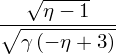

In [16]:
Q = sympy.Symbol('Q',positive=True)
temp = asymptotic_prefactors[1]/asymptotic_prefactors[2]
temp = temp.subs(eta*gamma+eta-5*gamma-1,-Q)
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
temp = temp.subs(gamma-1,Q)
temp = temp.simplify()
asymptotic_mach_number = temp
asymptotic_mach_number

More simplification for the density prefactor

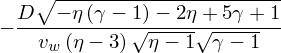

In [17]:
temp = asymptotic_prefactors[0]
temp = temp.subs(eta,Q+1)
temp = temp.simplify()
temp = temp.subs(Q,eta-1)
temp = temp.subs(eta,Q+3)
temp = temp.simplify()
temp = temp.subs(Q,eta-3)
temp = temp.subs(gamma,Q+1)
temp = temp.simplify()
temp = temp.subs(Q,gamma-1)
temp = temp.subs(eta*(gamma-1)+2*eta-5*gamma-1,-Q)
temp = temp.simplify()
temp = temp.subs(Q,-(eta*(gamma-1)+2*eta-5*gamma-1))
temp

The flow is supersonic at large distances when $\eta$ is greater than

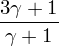

In [18]:
sympy.solve(asymptotic_mach_number-1,eta)[0]

# Free - fall solution
Very close to the SMBH

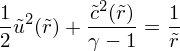

In [19]:
freefall_integral_energy = sympy.Eq(
    tilde_u(tilde_r)**2/2+tilde_c(tilde_r)**2/(gamma-1),
    1/tilde_r)
freefall_integral_energy

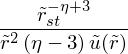

In [20]:
temp = integral_mass_conservation
temp = temp.subs(tilde_r**(3-eta),0)
freefall_density = sympy.solve(temp,tilde_rho(tilde_r))[0]
freefall_density

In [21]:
freefall_u_ansatz = sympy.sqrt(A)/sympy.sqrt(tilde_r)

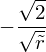

In [22]:
temp = dimles_momentum_conservation
temp = temp.subs(tilde_r**(-eta),0)
temp = temp.subs(tilde_p(tilde_r), tilde_rho(tilde_r)*tilde_c(tilde_r)**2/gamma)
temp = temp.subs(tilde_rho(tilde_r), freefall_density)
temp = temp.subs(sympy.solve(freefall_integral_energy,tilde_c(tilde_r)**2,dict=True)[0])
temp = temp.subs(tilde_u(tilde_r), freefall_u_ansatz)
temp = temp.doit()
temp = temp.lhs - temp.rhs
temp = temp.simplify()
temp = sympy.solve(temp,A)[0]
freefall_u = -freefall_u_ansatz.subs(A,temp)
freefall_u

This is true unless $\gamma = \frac{5}{3}$

In [23]:
temp = dimles_momentum_conservation
temp = temp.subs(tilde_r**(-eta),0)
temp = temp.subs(tilde_p(tilde_r), tilde_rho(tilde_r)*tilde_c(tilde_r)**2/gamma)
temp = temp.subs(tilde_rho(tilde_r), freefall_density)
temp = temp.subs(sympy.solve(freefall_integral_energy,tilde_c(tilde_r)**2,dict=True)[0])
temp = temp.subs(tilde_u(tilde_r), freefall_u_ansatz)
temp = temp.doit()
temp = temp.lhs - temp.rhs
temp = temp.subs(gamma,sympy.Rational(5,3))
temp = temp.simplify()
temp

# Secular analytic solution

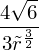

In [24]:
temp = asymptotic_prefactors[0]/tilde_r**sympy.Rational(3,2)
temp = temp.subs(gamma,sympy.Rational(5,3))
temp = temp.subs(eta,sympy.Rational(5,2))
secular_rho = temp/(D/v_w)
secular_rho

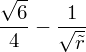

In [25]:
temp = dimles_mass_conservation
temp = temp.subs(tilde_rho(tilde_r), secular_rho)
temp = temp.doit()
temp = temp.subs(eta,sympy.Rational(5,2))
temp = sympy.dsolve(temp,tilde_u(tilde_r))
temp = temp.subs(sympy.Symbol('C1'),-1)
secular_u = temp.rhs 
secular_u

In [26]:
secular_stagnation = sympy.solve(secular_u,tilde_r)[0]
secular_stagnation

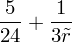

In [27]:
temp = integral_energy_conservation
temp = temp.subs(tilde_u(tilde_r),secular_u)
temp = temp.subs(tilde_r_st, secular_stagnation)
temp = temp.subs(eta,sympy.Rational(5,2))
temp = temp.subs(gamma,sympy.Rational(5,3))
temp = sympy.solve(temp,tilde_c(tilde_r)**2)[0]
temp = temp.subs(tilde_r,Q**2)
temp = temp.simplify()
temp = temp.subs(Q,sympy.sqrt(tilde_r))
secular_c2 = temp
secular_c2

Verification

In [28]:
temp = [dimles_mass_conservation,dimles_momentum_conservation,dimles_energy_conservation]
temp = map(lambda eqn:eqn.subs(tilde_p(tilde_r),tilde_rho(tilde_r)*tilde_c(tilde_r)**2/gamma),temp)
temp = map(lambda eqn:eqn.subs(tilde_c(tilde_r)**2,secular_c2),temp)
temp = map(lambda eqn:eqn.subs(tilde_rho(tilde_r),secular_rho),temp)
temp = map(lambda eqn:eqn.subs(tilde_u(tilde_r),secular_u),temp)
temp = map(lambda eqn:eqn.subs({gamma:sympy.Rational(5,3),eta:sympy.Rational(5,2)}),temp)
temp = map(lambda eqn:eqn.doit(),temp)
temp = map(lambda eqn:eqn.lhs-eqn.rhs,temp)
temp = map(lambda eqn:eqn.simplify(),temp)
list(temp)

# Integrating ODEs

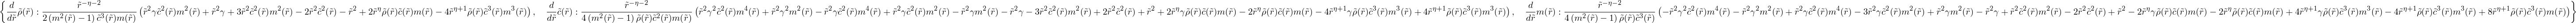

In [38]:
m = sympy.Symbol('m') # Mach number
temp = [dimles_mass_conservation,
        dimles_momentum_conservation,
        dimles_energy_conservation]
temp = [itm.subs(tilde_u(tilde_r), tilde_c(tilde_r)*m(tilde_r)) for itm in temp]
temp = [itm.subs(tilde_p(tilde_r), tilde_rho(tilde_r)*tilde_c(tilde_r)**2/gamma) for itm in temp]
temp = [itm.doit() for itm in temp]
isolated_odes = sympy.solve(temp, [m(tilde_r).diff(tilde_r),
                                   tilde_c(tilde_r).diff(tilde_r),
                                   tilde_rho(tilde_r).diff(tilde_r)])
isolated_odes

Determining the values of the variables at the sonic point

In [44]:
temp = integral_energy_conservation
temp = temp.subs(tilde_u(tilde_r), tilde_c(tilde_r))
raw_sonic_point_sound_speed = sympy.solve(temp, tilde_c(tilde_r))[1]

In [237]:
temp = integral_mass_conservation.subs(tilde_u(tilde_r), tilde_c(tilde_r))
temp = temp.subs(tilde_c(tilde_r), raw_sonic_point_sound_speed)
raw_sonic_point_density = sympy.solve(temp, tilde_rho(tilde_r))[0].simplify()

In [133]:
temp = tilde_rho(tilde_r).diff(tilde_r)
temp = temp.subs(isolated_odes)
temp = sympy.fraction(temp)[0]
temp = temp.subs(tilde_rho(tilde_r), raw_sonic_point_density)
temp = temp.subs(tilde_c(tilde_r), raw_sonic_point_sound_speed)
temp = temp.subs(m(tilde_r), 1)
temp = temp*tilde_r**(eta+2)
outer_sonic_equation = temp

To find the position of the outer sonic point, one must solve this horrible equation

In [136]:
def find_outer_sonic_point(gamma_val, eta_val, rst_val):
    
    from mpmath import findroot
    
    eqn = outer_sonic_equation
    eqn = eqn.subs({eta:eta_val,
                   gamma:gamma_val,
                   tilde_r_st:rst_val})
    deqn = eqn.diff(tilde_r)
    eqn = sympy.lambdify(tilde_r, eqn)
    deqn = sympy.lambdify(tilde_r, deqn)
    return float(findroot(eqn, 10*rst_val, df=deqn))
find_outer_sonic_point(4./3., 2.9, 9.1)

In [140]:
def find_inner_sonic_point(gamma_val, eta_val, rst_val):
    
    from mpmath import findroot
    
    eqn = outer_sonic_equation
    eqn = eqn.subs({eta:eta_val,
                   gamma:gamma_val,
                   tilde_r_st:rst_val})
    deqn = eqn.diff(tilde_r)
    eqn = sympy.lambdify(tilde_r, eqn)
    deqn = sympy.lambdify(tilde_r, deqn)
    return float(findroot(eqn, 0.1*rst_val, df=deqn))
find_inner_sonic_point(4./3., 2.9, 9.1)

Integration from the sonic point to the stagnation point

<IPython.core.display.Javascript object>


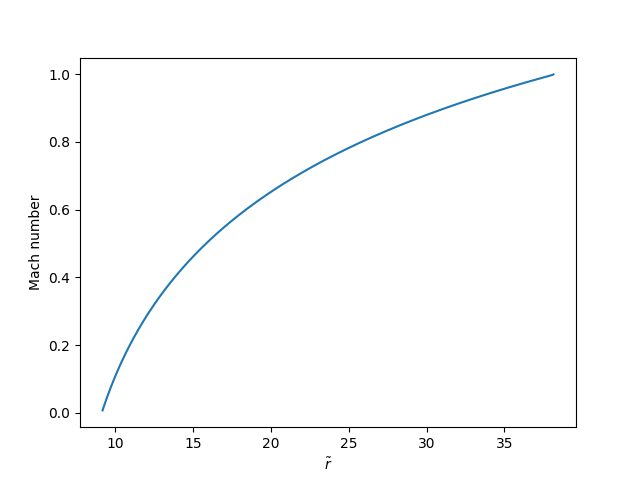

In [241]:
def integrate_outer(gamma_val, eta_val, rst_val):
    
    from scipy.integrate import ode
    import numpy
    
    sub_params = {eta:eta_val,
                 gamma:gamma_val,
                  tilde_r_st:rst_val}
    
    # Differential equations
    hydrodynamic_variables = [m,
                             tilde_c,
                             tilde_rho]
    explicit_odes = [itm(tilde_r).diff(tilde_r) for itm in hydrodynamic_variables]
    explicit_odes = [itm.subs(isolated_odes) for itm in explicit_odes]
    explicit_odes = [itm.subs(sub_params) for itm in explicit_odes]
    for var in hydrodynamic_variables:
        explicit_odes = [itm.subs(var(tilde_r), var) for itm in explicit_odes]
    raw_deriv_func = sympy.lambdify([tilde_r, m, tilde_c, tilde_rho], explicit_odes)
    deriv_wrapper = lambda x,y: raw_deriv_func(x,y[0],y[1],y[2])
    
    outer_sonic_point = find_outer_sonic_point(gamma_val, eta_val, rst_val)
    outer_density = raw_sonic_point_density.subs(sub_params).subs(tilde_r,outer_sonic_point)
    outer_sound_speed = raw_sonic_point_sound_speed.subs(sub_params).subs(tilde_r,outer_sonic_point)
    r_start_outer = (1.0-1e-3)*outer_sonic_point
    r_stop_outer = (1+1e-2)*rst_val
    dr_outer = 1e-4*(r_start_outer - r_stop_outer)
        
    outer_init_cond = [1-1e-3, outer_sound_speed, outer_density]
    
    integrator = ode(deriv_wrapper)
    integrator.set_initial_value(outer_init_cond, r_start_outer)
    x_list = []
    y_list = []
    while integrator.successful() and integrator.t>r_stop_outer:
        integrator.integrate(integrator.t - dr_outer)
        x_list.append(integrator.t)
        y_list.append(integrator.y)
    assert(integrator.successful())
    x_list = numpy.array(x_list)
    y_list = numpy.array(y_list)
    return x_list, y_list
    
import pylab
x_list, y_list = integrate_outer(4./3., 2.9, 9.1)
%matplotlib notebook
pylab.plot(x_list ,y_list.T[0])
pylab.xlabel(r'$\tilde{r}$')
pylab.ylabel('Mach number')
pass

<IPython.core.display.Javascript object>


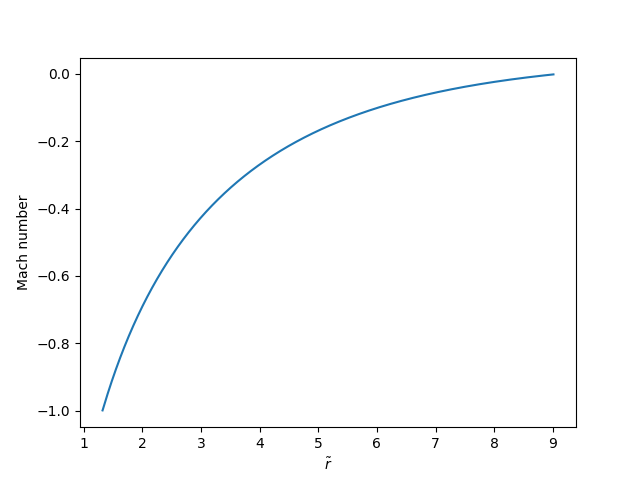

In [242]:
def integrate_inner(gamma_val, eta_val, rst_val):
    
    from scipy.integrate import ode
    import numpy
    
    sub_params = {eta:eta_val,
                 gamma:gamma_val,
                  tilde_r_st:rst_val}
    
    # Differential equations
    hydrodynamic_variables = [m,
                             tilde_c,
                             tilde_rho]
    explicit_odes = [itm(tilde_r).diff(tilde_r) for itm in hydrodynamic_variables]
    explicit_odes = [itm.subs(isolated_odes) for itm in explicit_odes]
    explicit_odes = [itm.subs(sub_params) for itm in explicit_odes]
    for var in hydrodynamic_variables:
        explicit_odes = [itm.subs(var(tilde_r), var) for itm in explicit_odes]
    raw_deriv_func = sympy.lambdify([tilde_r, m, tilde_c, tilde_rho], explicit_odes)
    deriv_wrapper = lambda x,y: raw_deriv_func(x,y[0],y[1],y[2])
    
    inner_sonic_point = find_inner_sonic_point(gamma_val, eta_val, rst_val)
    bc_density = -raw_sonic_point_density.subs(sub_params).subs(tilde_r,inner_sonic_point)
    bc_sound_speed = raw_sonic_point_sound_speed.subs(sub_params).subs(tilde_r,inner_sonic_point)
    r_stop = (1-1e-2)*rst_val
    dr = 1e-4*(r_stop - inner_sonic_point)   
    r_start = inner_sonic_point+0.5*dr
    init_cond = [-1+1e-3, bc_sound_speed, bc_density]
    
    integrator = ode(deriv_wrapper)
    integrator.set_initial_value(init_cond, r_start)
    x_list = []
    y_list = []
    while integrator.successful() and integrator.t<r_stop:
        integrator.integrate(integrator.t + dr)
        x_list.append(integrator.t)
        y_list.append(integrator.y)
    assert(integrator.successful())
    x_list = numpy.array(x_list)
    y_list = numpy.array(y_list)
    return x_list, y_list
    
import pylab
x_list, y_list = integrate_inner(4./3., 2.9, 9.1)
%matplotlib notebook
pylab.plot(x_list ,y_list.T[0])
pylab.xlabel(r'$\tilde{r}$')
pylab.ylabel('Mach number')
pass

In [274]:
def calc_stagnation_derivative_difference(gamma_val, eta_val, rst_val, verbose=False):
    x_outer, y_outer = integrate_outer(gamma_val, eta_val, rst_val)
    x_inner, y_inner = integrate_inner(gamma_val, eta_val, rst_val)
    m_outer = y_outer.T[0]
    m_inner = y_inner.T[0]
    deriv_outer = (m_outer[-1]-m_outer[-2])/(x_outer[-1] - x_outer[-2])
    deriv_inner = (m_inner[-1]-m_inner[-2])/(x_inner[-1] - x_inner[-2])
    if verbose:
        print('called with', rst_val, 'evaluated', deriv_outer - deriv_inner)
    return deriv_outer - deriv_inner

calc_stagnation_derivative_difference(4./3., 2.9, 9.1)

In [272]:
calc_stagnation_derivative_difference(4./3., 2.9, 3.9)

Finall, we can numerically solve for the location of the stagnation point

In [275]:
from mpmath import findroot

findroot(lambda x: calc_stagnation_derivative_difference(4./3., 2.9, x, verbose=True), 3.9, tol=1e-3)

called with 3.89999999999999991118 evaluated -0.0276764955729
called with 3.89999999999999991118 evaluated -0.0276764955729
called with 4.14999999999999991118 evaluated 0.00569928297774
called with 4.10730973759098289116 evaluated 0.000970616706661
called with 4.09854703801977010226 evaluated -0.000512700030044
called with 4.10157581550353855508 evaluated 0.00026551716635
called with 4.1005424376512882443 evaluated -0.000306514180864


mpf('4.1005424376512882')

In [276]:
findroot(lambda x: calc_stagnation_derivative_difference(4./3., 2.8, x, verbose=True), 4.1, tol=1e-3)

called with 4.09999999999999964473 evaluated -0.0147287512009
called with 4.09999999999999964473 evaluated -0.0147287512009
called with 4.34999999999999964473 evaluated 0.0122528587213
called with 4.23647027775016535624 evaluated 0.00129954186284
called with 4.22300069327206101119 evaluated -0.00124099483939
called with 4.22958028128251078996 evaluated -0.000502249173701
called with 4.23405352937722948461 evaluated 0.0010328971484
called with 4.23104378031643594594 evaluated -0.000338546051618
called with 4.2317867484983307238 evaluated -0.000255522923542


mpf('4.2317867484983307')

In [277]:
findroot(lambda x: calc_stagnation_derivative_difference(4./3., 2.7, x, verbose=True), 4.1, tol=1e-3)

called with 4.09999999999999964473 evaluated -0.0186851767205
called with 4.09999999999999964473 evaluated -0.0186851767205
called with 4.34999999999999964473 evaluated 0.00648411517149
called with 4.28559497820474407282 evaluated -0.00482277676401
called with 4.31306592639915390168 evaluated 0.00314592053401
called with 4.30222081373124462304 evaluated -0.00313055204898
called with 4.30763009246783221356 evaluated 0.0026474617516
called with 4.30515158357998073437 evaluated 0.00241963317384
called with 4.27882880008353832097 evaluated -0.00551829836412


mpf('4.2788288000835383')

In [278]:
findroot(lambda x: calc_stagnation_derivative_difference(4./3., 2.67, x, verbose=True), 4.3, tol=1e-3)

called with 4.29999999999999982236 evaluated -0.00277893826298
called with 4.29999999999999982236 evaluated -0.00277893826298
called with 4.54999999999999982236 evaluated 0.0263531451735
called with 4.32384774735587777745 evaluated 0.0111220949503
called with 4.1587056993498193799 evaluated -0.0166455668606
called with 4.25770153919760627418 evaluated -0.00669520052831
called with 4.32431185052822349745 evaluated -0.00050697318221
called with 4.32976892888275003122 evaluated 0.0115218954681
called with 4.32454184658682089309 evaluated 0.0111689711746
called with 4.15912072778532025501 evaluated 0.000749409346693
called with 4.14722309383316509264 evaluated 0.000959689056867
called with 4.20152233695567837134 evaluated -0.0121041841532
called with 4.15121198660508471398 evaluated -0.0173059104836
called with 4.3185922685072739844 evaluated -0.00103729746728
called with 4.32926454538266878606 evaluated 0.0114878458717
called with 4.31947611673745621825 evaluated -0.00095520489833
called 

mpf('4.3297673489503864')

In [286]:
findroot(lambda x: calc_stagnation_derivative_difference(4./3.-0.01, 3.1, x, verbose=True), 8, tol=1e-3)

called with 8.0 evaluated 0.136996281499
called with 8.0 evaluated 0.136996281499
called with 8.25 evaluated 0.136470581192
called with 73.1494204605858065255 evaluated 0.0253011737481
called with 87.91995446791815441 evaluated 0.0211927763378
called with 164.112345891330557964 evaluated 0.0115155942024
called with 254.779303344895941999 evaluated 0.00747009384827
called with 422.197575952180172811 evaluated 0.00452302979956
called with 679.144090679504426645 evaluated 0.00281876109267
called with 1104.11864761518429104 evaluated 0.00173821953166
called with 1787.75646588585331661 evaluated 0.00107347136573
called with 2891.73186598405476158 evaluated 0.000664672705153
called with 4686.70427261929824544 evaluated 0.000409855183097
called with 7573.78495074733294455 evaluated 0.000253672779859
called with 12263.0057983643532129 evaluated 0.00015669335328
called with 19839.5585251008009331 evaluated 9.69563841771e-05
called with 32136.7200306983507323 evaluated 5.98590145139e-05
called w

ValueError: Could not find root within given tolerance. (2.46672347457279950589399973e-24 > 2.06795153138256918717852173e-25)
Try another starting point or tweak arguments.